# Convergence of PL interpolation

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$.

In [1]:
using FundamentalsNumericalComputation

f = x -> exp(sin(7*x))
x = (0:10000)/1e4  # sample the difference at many points
n = @. 2^(3:10)
err = zeros(size(n))
for (i,n) = enumerate(n)
    t = (0:n)/n   # interpolation nodes
    p = FNC.plinterp(t,f.(t))
    err[i] = maximum( @. abs(f(x)-p(x)) )
end

Since we expect convergence that is $O(h^2)=O(n^{-2})$, we use a log-log graph of error and expect a straight line of slope $-2$.

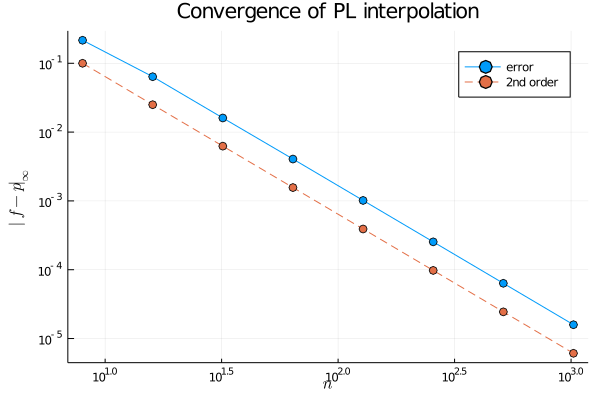

In [5]:
using Plots,LaTeXStrings
order2 = @. 0.1*(n/n[1])^(-2)
plot(n,[err order2],m=:o,l=[:solid :dash],label=["error" "2nd order"],
    xaxis=(:log10,L"n"),yaxis=(:log10,L"\| f-p \|_\infty"),title="Convergence of PL interpolation")